In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import json

In [2]:
df = pd.read_csv('pg_clean.csv')

In [3]:
df.head()

,id,author,title,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,rating
0,50921,Jack McKenty,"$1,000 a Plate","[0.2222222222222222, 0.0, 0.0, 0.0, 0.0, 0.1, ...","[0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.1, ...","[0.0, 0.16666666666666666, 0.0, 0.0, 0.0, 0.1,...","[0.1111111111111111, 0.16666666666666666, 0.0,...","[0.2222222222222222, 0.16666666666666666, 0.0,...","[0.2222222222222222, 0.0, 0.0, 0.0, 0.5, 0.1, ...","[0.1111111111111111, 0.16666666666666666, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.16666666666666666, 0.0, 0.0, 0.0, 0.1,...",2.5
1,21279,Kurt Vonnegut,2 B R 0 2 B,"[0.25, 0.125, 0.0, 0.0, 0.0, 0.0, 0.1111111111...","[0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.11111111111...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1111111111111...","[0.0, 0.375, 0.0, 1.0, 0.0, 0.0, 0.11111111111...","[0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.222222222222...","[0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11111111111...","[0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.11111111111...",3.9
2,22227,Graph Waldeyer,The 4-D Doodler,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25,...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.5, 1.0, 0.3333333333333333, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25,...",2.9
3,24517,Peter Baily,Accidental Death,"[0.3333333333333333, 1.0, 0.0, 0.125, 0.2, 0.0...","[0.0, 0.0, 0.0, 0.125, 0.1, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.16666666666666666, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.05555555555555555, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.2222222222222222, 0.0, 0.0, 0.0, ...","[0.6666666666666666, 0.0, 0.1111111111111111, ...","[0.0, 0.0, 0.16666666666666666, 0.375, 0.2, 0....","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.1111111111111111, 0.0, 0.0, 0.0, ...",3.2
4,24749,Mack Reynolds,Adaptation,"[0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.3333333333333...","[0.0, 0.0, 0.1, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.2, 0.0, 0.1, 0.0, 0.0, 0.3333333333333333, ...","[0.06666666666666667, 0.0, 0.2, 0.0, 0.0, 0.0,...","[0.3333333333333333, 0.0, 0.1, 0.25, 1.0, 0.33...","[0.26666666666666666, 1.0, 0.1, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, ...","[0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06666666666666667, 0.0, 0.1, 0.25, 0.0, 0.3...",3.5


/home/jaap/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

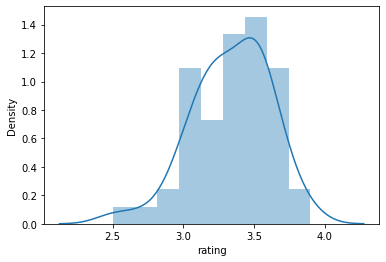

In [4]:
ratings = df['rating']
fig = plt.figure()
sns.distplot(ratings)

In [5]:
from scipy.fft import fft, ifft, fftfreq

def nrc_values(df, idx):

    # nrc_columns = ['anger', 'trust', 'surprise', 'positive', 'negative',
    #               'sadness', 'disgust', 'joy']
    
    nrc_columns = ['positive', 'negative']

    plt.figure(figsize=(6.4, 4.8))

    for val in nrc_columns:
        
        
        y = json.loads(df[val][idx])
        n = len(y)
        
        t = 1/200
        
        x = np.linspace(0.0, n*t, endpoint=False)
        y = fft(y)
        
        x = fftfreq(n, t)[:n//2]
        plt.plot(x, 2.0/n * np.abs(y[0:n//2]), label=val)
        
        
        
        

    plt.xlabel('Sentence')
    plt.ylabel('Emotion frequency')
    plt.title(df['title'][idx] + ' by ' + df['author'][idx])
    plt.legend(loc='best')
    plt.grid()
    # plt.xlim((5, 400))
    plt.ylim((0, 0.15))
    



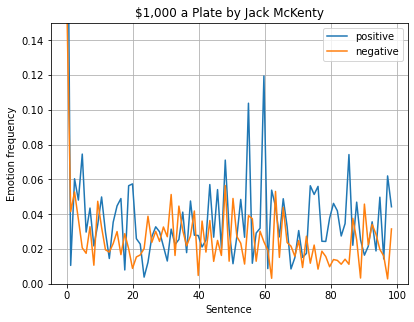

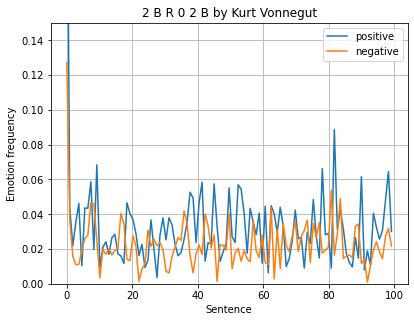

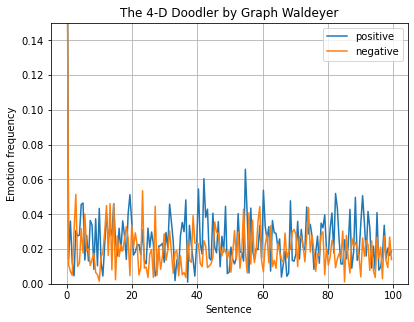

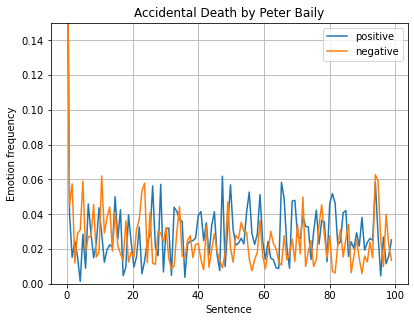

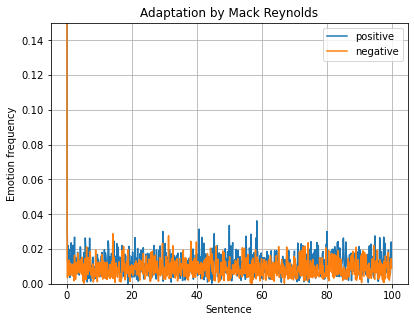

In [6]:
for idx in range(5):
        nrc_values(df, idx)

In [7]:
def nrc_values(df, idx):

    # nrc_columns = ['anger', 'trust', 'surprise', 'positive', 'negative',
    #               'sadness', 'disgust', 'joy']
    
    nrc_columns = ['positive', 'negative']

    plt.figure(figsize=(6.4, 4.8))

    for val in nrc_columns:
        
        
        y = json.loads(df[val][idx])
        n = [i for i in range(len(y))]
        
        
        plt.plot(n, y, label=val)
        
        
        
        

    plt.xlabel('Sentence')
    plt.ylabel('Emotion frequency')
    plt.title(df['title'][idx] + ' by ' + df['author'][idx])
    plt.legend(loc='best')
    plt.grid()
    # plt.xlim((5, 400))
    # plt.ylim((0, 0.15))

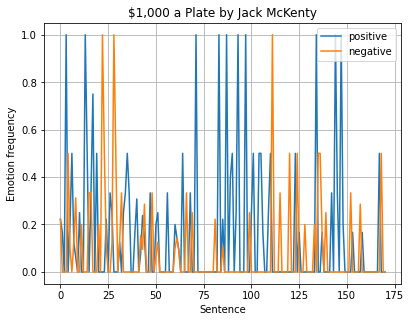

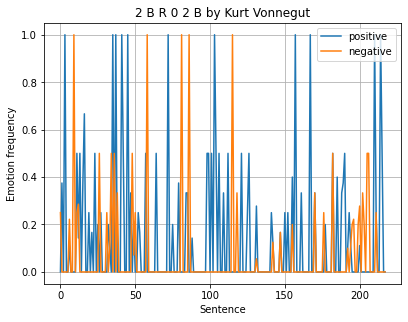

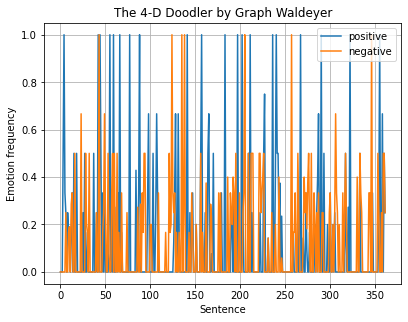

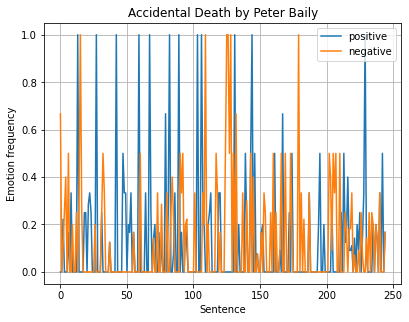

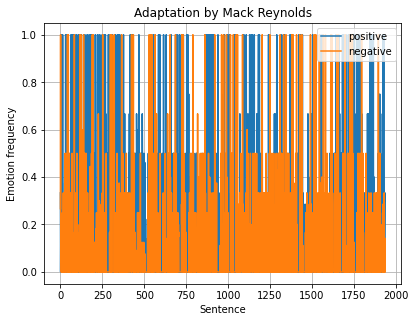

In [8]:
for idx in range(5):
        nrc_values(df, idx)

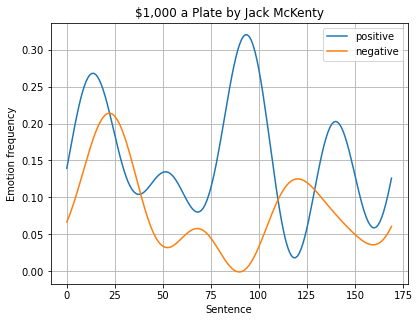

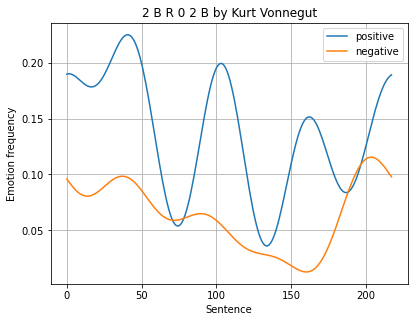

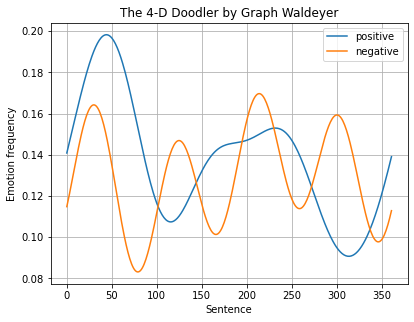

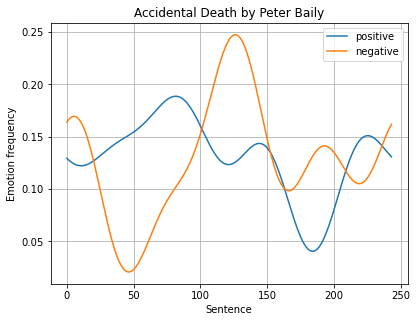

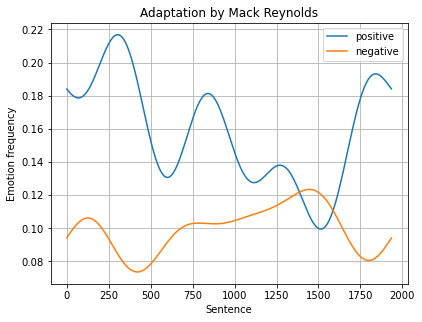

In [9]:
def nrc_values(df, term, idx):

    # nrc_columns = ['anger', 'trust', 'surprise', 'positive', 'negative',
    #               'sadness', 'disgust', 'joy']
    
    nrc_columns = ['positive', 'negative']

    plt.figure(figsize=(6.4, 4.8))

    for val in nrc_columns:
        
        
        y = json.loads(df[val][idx])
        n = [i for i in range(len(y))]
        
        rft = np.fft.rfft(y)
        rft[term:] = 0
        y_smooth = np.fft.irfft(rft)
        
        x = [i for i in range(len(y_smooth))]
        # plt.plot(n, y, label=val)
        plt.plot(x, y_smooth, label=val)
        
        
        
        

    plt.xlabel('Sentence')
    plt.ylabel('Emotion frequency')
    plt.title(df['title'][idx] + ' by ' + df['author'][idx])
    plt.legend(loc='best')
    plt.grid()
    # plt.xlim((5, 400))
    # plt.ylim((0, 0.15))
    
for idx in range(5):
        nrc_values(df, 5, idx)
    

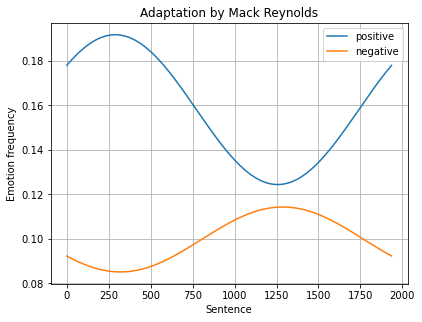

In [16]:
nrc_values(df, 2, 4)

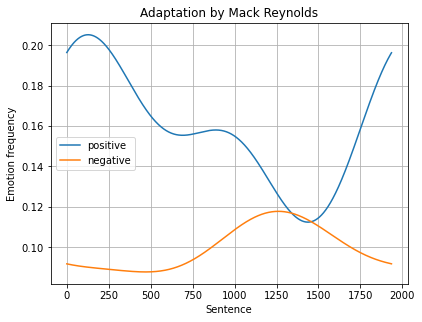

In [17]:
nrc_values(df, 3, 4)

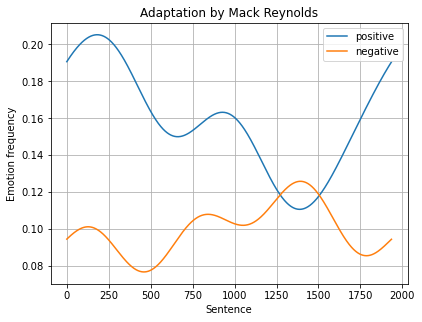

In [18]:
nrc_values(df, 4, 4)

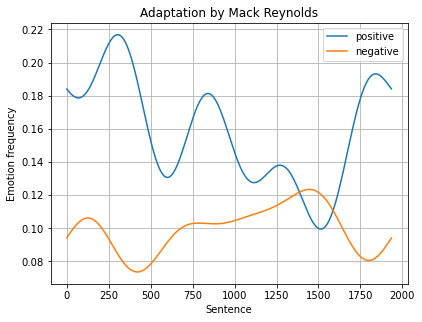

In [19]:
nrc_values(df, 5, 4)

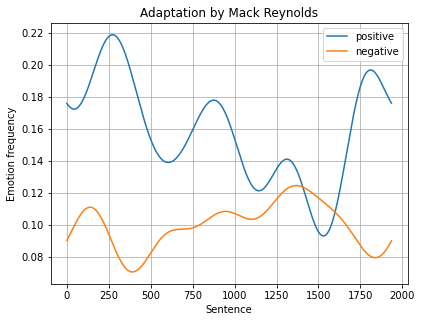

In [20]:
nrc_values(df, 6, 4)